In [ ]:
#Importing the required libraries / packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import norm, binom, uniform, geom, expon

In [ ]:
#Reading the dataset

df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094')

**Analysing the basic metrics**


In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df.shape

(550068, 10)

In [ ]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [ ]:
# Converting the required columns to categorical attributes
categorical_cols = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_ID', 'User_ID', 'Occupation','Product_Category']
df[categorical_cols] = df[categorical_cols].astype('category')


In [ ]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [ ]:
# Statistical summary of the dataset

df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,550068.0,550068,550068,550068,550068.0,550068,550068,550068.0,550068.0,550068.000000
unique,5891.0,3631,2,7,21.0,3,5,2.0,20.0,NaN
top,1001680.0,P00265242,M,26-35,4.0,B,1,0.0,5.0,NaN
freq,1026.0,1880,414259,219587,72308.0,231173,193821,324731.0,150933.0,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9263.968713
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5023.065394
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5823.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8047.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12054.000000


In [ ]:
#Finding the missing values
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

**Non-Graphical Analysis: Value counts and unique attributes ​**

In [ ]:
marital_status_counts = df['Marital_Status'].value_counts()
print("Marital_Status Value Counts:")
print(marital_status_counts)


Marital_Status Value Counts:
0    324731
1    225337
Name: Marital_Status, dtype: int64


In [ ]:
gender_counts = df['Gender'].value_counts()
print("Gender Value Counts:")
print(gender_counts)


Gender Value Counts:
M    414259
F    135809
Name: Gender, dtype: int64


In [ ]:
city_category_counts = df['City_Category'].value_counts()
print("City_Category Value Counts:")
print(city_category_counts)


City_Category Value Counts:
B    231173
C    171175
A    147720
Name: City_Category, dtype: int64


In [ ]:
age_value_counts = df['Age'].value_counts()
print("Age Value Counts:")
print(age_value_counts)


Age Value Counts:
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64


In [ ]:
occupation_value_counts = df['Occupation'].value_counts()
print("Occupation Value Counts:")
print(occupation_value_counts)


Occupation Value Counts:
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64


In [ ]:
product_category_value_counts = df['Product_Category'].value_counts()
print("Product_Category Value Counts:")
print(product_category_value_counts)


Product_Category Value Counts:
5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64


In [ ]:
column_to_use = df.columns
for col in column_to_use:
  column_unique = df[col].nunique()
  print(f"{col} Unique Attributes:",column_unique)

User_ID Unique Attributes: 5891
Product_ID Unique Attributes: 3631
Gender Unique Attributes: 2
Age Unique Attributes: 7
Occupation Unique Attributes: 21
City_Category Unique Attributes: 3
Stay_In_Current_City_Years Unique Attributes: 5
Marital_Status Unique Attributes: 2
Product_Category Unique Attributes: 20
Purchase Unique Attributes: 18105


**INSIGHTS**


* The dataset comprises of transactional data of customers who purchased
products from the Walmart Stores during the Black Friday sales. The dataset
has 10 attributes namely: User_ID, Product_ID, Gender, Age, City_Category,
Stay_In_Current_City_Years, Marital_Status, Product_Category, Purchase.

* The dataset consists of 550,068 rows and 10 columns. Among these columns,
User_ID, Occupation, Marital_Status, Product_Category, and Purchase are of
integer datatype, while the remaining columns are of object datatype.

* All the attributes contain 550,068 non-null entries and have no missing
values.

* The average purchase amount is approximately USD 9,263.97,with a
standard deviation of approximately USD 5,023.07. The maximum
purchase amount recorded is USD 23,961, and the minimum purchase
amount is USD 12.

* There are more entries with Marital_Status 0 (324,731) than
Marital_Status 1 (225,337), indicating a higher representation of
unmarried individuals.
* The dataset is skewed towards male customers (414,259) compared to
female customers (135,809).
* City_Category 'B' has the highest representation (231,173), followed
by 'C' (171,175) and 'A' (147,720).
* The age group '26-35' is the most represented (219,587), while '55+'
(21,504) and '0-17' (15,102) have the least representation, suggesting
potential underrepresentation of older and younger age groups.
* Occupation '4' is the most frequent (72,308), followed by '0' (69,638)
and '7' (59,133), reflecting diverse occupational representation.
Occupations '8', '9', and '18' have the fewest occurrences (1,546,
6,291, and 6,622, respectively)
* Product_Category '5' is the most popular (150,933), followed by '1'
(140,378) and '8' (113,925). Product categories '9', '17', and '14' are
the least represented (410, 578, and 1,523, respectively), indicating
niche or less popular product categories.


**Graphical Analysis**

<ipython-input-180-ece07c20f082>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Purchase'], kde=False,bins = 12, color='blue')


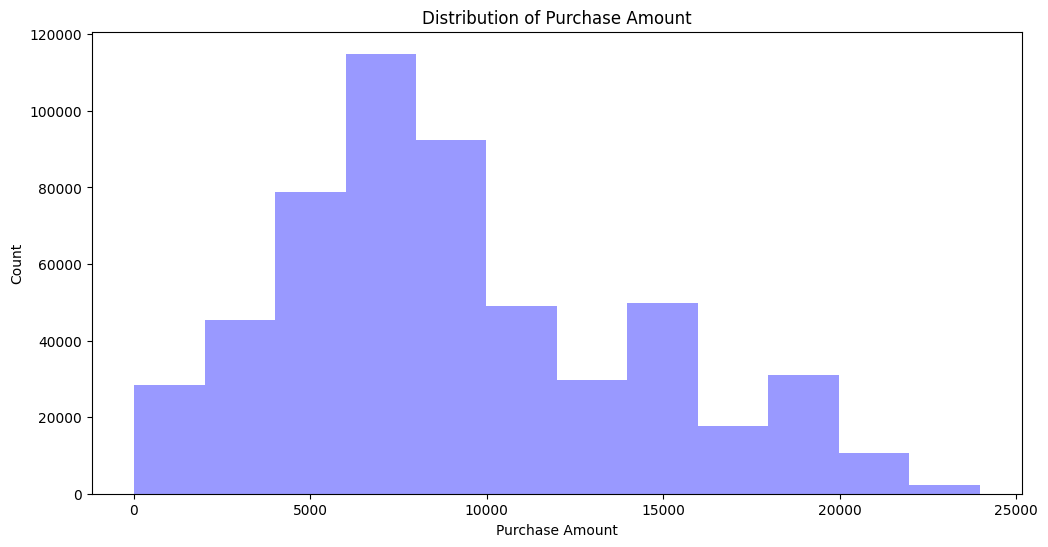

In [ ]:
# Distplot for 'Purchase'
plt.figure(figsize=(12, 6))
sns.distplot(df['Purchase'], kde=False,bins = 12, color='blue')
plt.title('Distribution of Purchase Amount')
plt.xlabel('Purchase Amount')
plt.ylabel('Count')
plt.show()

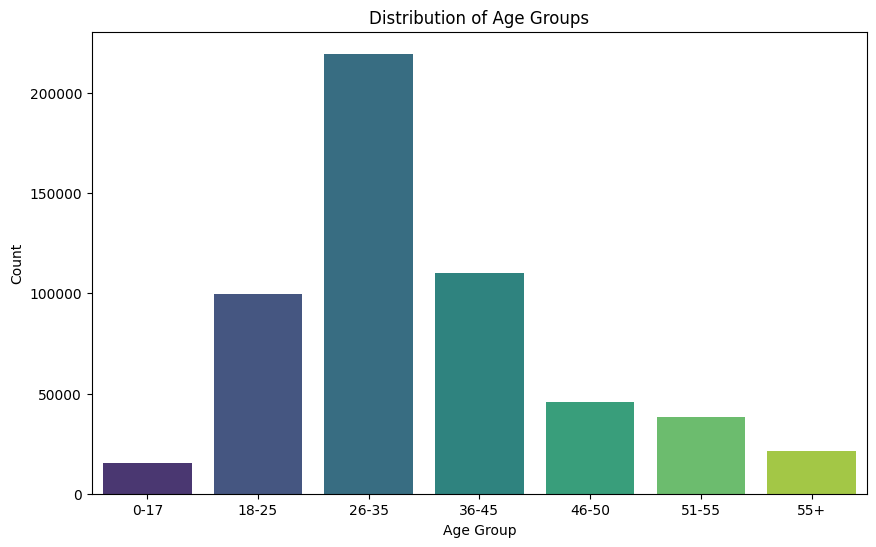

In [ ]:
# Countplot for 'Age'
plt.figure(figsize=(10, 6))
sns.countplot(x='Age', data=df, palette='viridis')
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

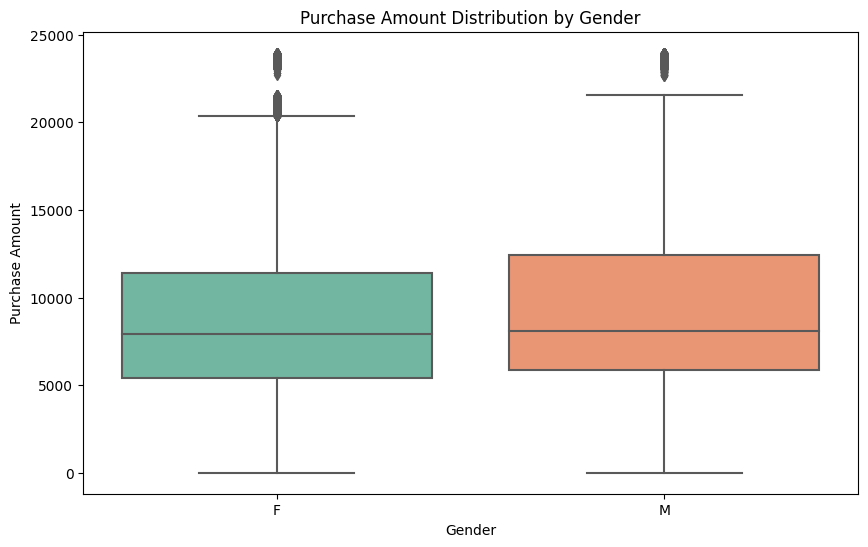

In [ ]:
# Boxplot for 'Gender' vs 'Purchase'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Purchase', data=df, palette='Set2')
plt.title('Purchase Amount Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount')
plt.show()

In [ ]:
gender_purchase_stats = df.groupby('Gender')['Purchase'].agg(['min', 'max', 'mean'])
gender_purchase_stats

,min,max,mean
Gender,,,
F,12,23959,8734.565765
M,12,23961,9437.526040


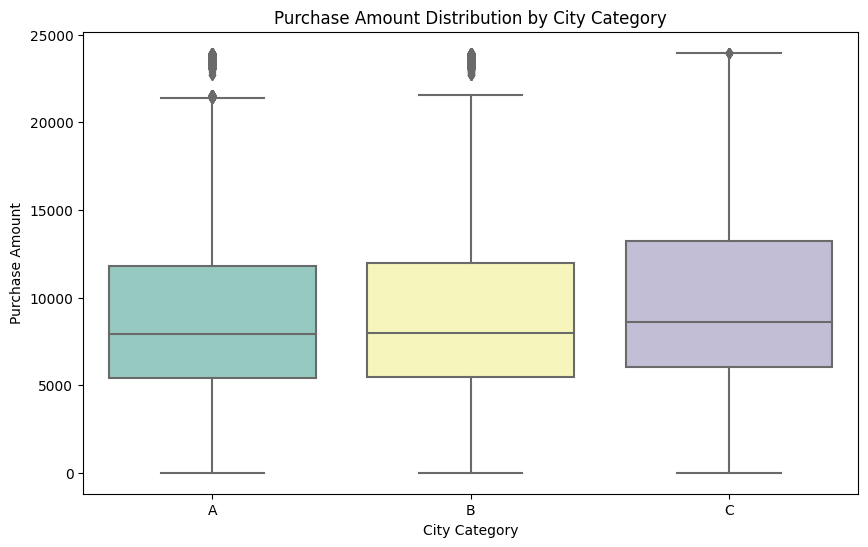

In [ ]:
# Boxplot for 'City_Category' vs 'Purchase'
plt.figure(figsize=(10, 6))
sns.boxplot(x='City_Category', y='Purchase', data=df, palette='Set3')
plt.title('Purchase Amount Distribution by City Category')
plt.xlabel('City Category')
plt.ylabel('Purchase Amount')
plt.show()


In [ ]:
city_purchase_stats = df.groupby('City_Category')['Purchase'].agg(['min', 'max', 'median'])
city_purchase_stats

,min,max,median
City_Category,,,
A,12,23961,7931.0
B,12,23960,8005.0
C,12,23961,8585.0


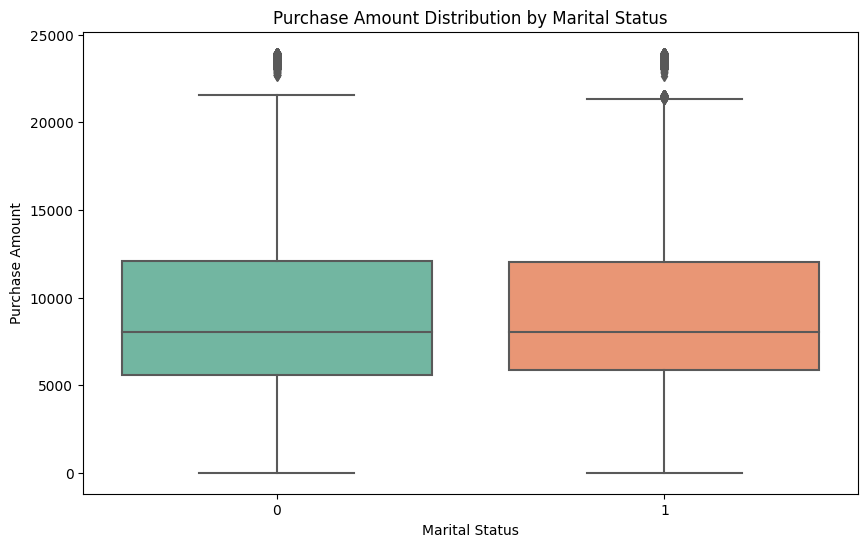

In [ ]:
# Boxplot for 'Marital Status' vs 'Purchase'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Marital_Status', y='Purchase', data=df, palette='Set2')
plt.title('Purchase Amount Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Purchase Amount')
plt.show()

In [ ]:
maritalstatus_purchase_stats = df.groupby('Marital_Status')['Purchase'].agg(['min', 'max', 'median'])
maritalstatus_purchase_stats

,min,max,median
Marital_Status,,,
0,12,23961,8044.0
1,12,23961,8051.0


**INSIGHTS**

* The distribution of purchase amounts highlights a substantial
concentration in the range of USD 6000 to USD 12000, peaking specifically in the
USD 6000 to USD 8000 range. Notably, there is a discernible decrease in counts
for higher purchase amounts exceeding USD16000, indicative of a skewed
distribution towards moderate purchase values during the observed
period.
* The distribution of age among customers reveals that individuals aged
between 26 and 35 constitute the largest group, with a substantial
representation. Conversely, the age groups of '55+' and '0-17' exhibit
lower counts, suggesting a potential underrepresentation of older and
younger demographics in the dataset.
* The boxplot analysis comparing 'Gender' and 'Purchase' reveals distinct
patterns in purchasing behaviour between male and female customers.
The median purchase amount for both genders is comparable, with
female customers having a median purchase amount of USD 7,914 and male
customers of USD 8,098. However, male customers exhibit a wider range of
purchase amounts, ranging from USD 12 to USD 23,961, with more outliers
suggesting greater variability in spending. Notably, female customers,
while having a concentrated distribution, showcase more outliers in their
purchase amounts, implying occasional high-value purchases. This insight
reinforces the observation that while the median spending is similar
between genders, there are more instances of both low and high-value
purchases among male customers, contributing to the observed wider
distribution and higher maximum purchase amounts.
* The boxplot analysis for 'City_Category' vs 'Purchase' unveils nuanced
spending behaviours across cities. City_Category 'C' distinguishes itself
with the highest median purchase amount of USD 8,585 and a wider
spending range, suggesting potentially varied purchasing power or diverse
consumer preferences. 'A' and 'B' exhibit comparable median values, yet
'A' displays a more constrained spending range, while 'B' showcases
slightly higher variability, implying distinct spending dynamics in these city
categories
* The boxplot analysis for 'Marital_Status' vs 'Purchase' showcases
comparable spending patterns between married (Marital_Status 1) and
unmarried (Marital_Status 0) customers. Both groups exhibit similar
median purchase amounts, with Marital_Status 0 at USD 8,044 and
Marital_Status 1 at USD 8,051. The spending variability, as reflected in the
interquartile range, appears consistent between the two groups. The
absence of notable differences in median values and variability suggests
that marital status alone may not be a significant predictor of purchasing
behavior in this context.

**Missing Values and Outlier Detection**

In [ ]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print(missing_values)



User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64


In [ ]:
#Outlier Detection

Q1 = df['Purchase'].quantile(0.25)
Q3 = df['Purchase'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (df['Purchase'] < lower_bound) | (df['Purchase'] > upper_bound)
outlier_count = outliers.sum()
print(f"Number of outliers in Purchase : {outlier_count}")

Number of outliers in Purchase : 2677


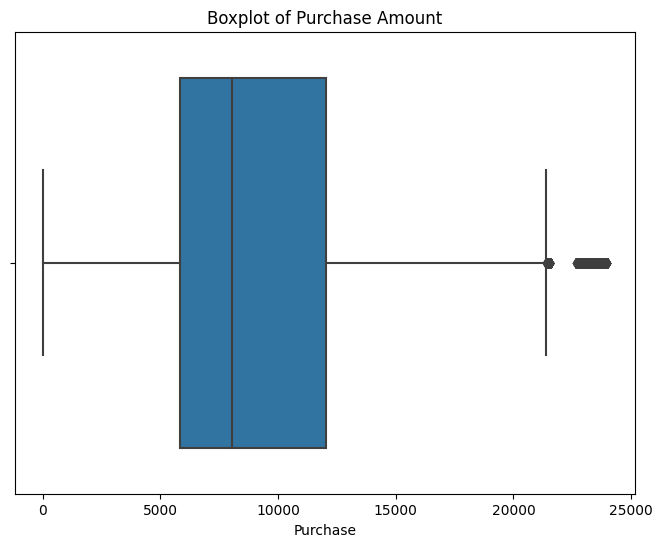

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Purchase'])
plt.title('Boxplot of Purchase Amount')
plt.show()

**INSIGHTS**

* There are no missing values in the provided dataset across the columns. All
columns have complete data.
* The analysis of the 'Purchase' column reveals the presence of 2,677 outliers
based on the Interquartile Range (IQR) method. In the context of purchase
amounts, these outliers may represent exceptionally high purchase amounts.


**3. Business Insights based on Non- Graphical and Visual Analysis**

Range of Attributes

In [ ]:
# Gender Value Counts
gender_count = df['Gender'].value_counts()
print("Gender Value Counts ")
print(gender_count)
print("**********************\n")

# Top 5 Age groups
age_count = df['Age'].value_counts().head(5)
print("Top 5 Age Groups ")
print(age_count)
print("**********************\n")

# Bottom 5 Age groups
age_count1 = df['Age'].value_counts().tail(5)
print("Bottom 5 Age Groups ")
print(age_count1)
print("**********************\n")

# Top 5 Occupations
occupation_count = df['Occupation'].value_counts().head(5)
print("Top 5 Occupations ")
print(occupation_count)
print("**********************\n")

# Bottom 5 Occupations
occupation_count1 = df['Occupation'].value_counts().tail(5)
print("Bottom 5 Occupations ")
print(occupation_count1)
print("**********************\n")

# Top 5 City Categories
city_count = df['City_Category'].value_counts().head(5)
print("Top 5 City Categories ")
print(city_count)
print("**********************\n")

# Bottom 5 City Categories
city_count1 = df['City_Category'].value_counts().tail(5)
print("Bottom 5 City Categories ")
print(city_count1)
print("**********************\n")

# Top 5 Stay_In_Current_City_Years
stay_years_count = df['Stay_In_Current_City_Years'].value_counts().head(5)
print("Top 5 Stay_In_Current_City_Years ")
print(stay_years_count)
print("**********************\n")

# Bottom 5 Stay_In_Current_City_Years
stay_years_count1 = df['Stay_In_Current_City_Years'].value_counts().tail(5)
print("Bottom 5 Stay_In_Current_City_Years ")
print(stay_years_count1)
print("**********************\n")

# Marital_Status Value Counts
marital_status_count = df['Marital_Status'].value_counts()
print("Marital_Status Value Counts ")
print(marital_status_count)
print("**********************\n")

# Top 5 Product Categories
product_category_count = df['Product_Category'].value_counts().head(5)
print("Top 5 Product Categories ")
print(product_category_count)
print("**********************\n")

# Bottom 5 Product Categories
product_category_count1 = df['Product_Category'].value_counts().tail(5)
print("Bottom 5 Product Categories ")
print(product_category_count1)
print("**********************\n")


Gender Value Counts 
M    414259
F    135809
Name: Gender, dtype: int64
**********************

Top 5 Age Groups 
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
Name: Age, dtype: int64
**********************

Bottom 5 Age Groups 
18-25    99660
46-50    45701
51-55    38501
55+      21504
0-17     15102
Name: Age, dtype: int64
**********************

Top 5 Occupations 
4     72308
0     69638
7     59133
1     47426
17    40043
Name: Occupation, dtype: int64
**********************

Bottom 5 Occupations 
19    8461
13    7728
18    6622
9     6291
8     1546
Name: Occupation, dtype: int64
**********************

Top 5 City Categories 
B    231173
C    171175
A    147720
Name: City_Category, dtype: int64
**********************

Bottom 5 City Categories 
B    231173
C    171175
A    147720
Name: City_Category, dtype: int64
**********************

Top 5 Stay_In_Current_City_Years 
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_I

**INSIGHTS**
* The dataset shows a significant gender imbalance with 414,259 male
customers and 135,809 female customers. This skew might influence
purchasing patterns.
* The most common age group making purchases is 26-35, followed by 36-45
and 18-25. The least common age groups are 55+ and 0-17, suggesting a
focus on young to middle-aged customers.
* Occupation 4 has the highest representation in the dataset, indicating a
prevalent occupation among Walmart customers. Occupations 19, 13, 18, 9,
and 8 are less common.
* City Category B has the highest customer count, followed by C and A. The
bottom 5 city categories are the same as the top 5, indicating a lack of
diversity in city categories.
* Customers who have stayed for 1 year in the current city make the most
purchases, followed by those who have stayed for 2 and 3 years. The
distribution is relatively consistent for the bottom 5 stay-in years.
* There are more married customers (Marital Status 0) than unmarried (Marital
Status 1) customers. The difference in counts suggests married individuals are
more active shoppers.
* Product Category 5 is the most popular, followed by 1 and 8. Product
categories 20, 19, 14, 17, and 9 are less popular, indicating potential areas for
improvement or marketing focus.


**Distribution of the variables and Relationship between them**

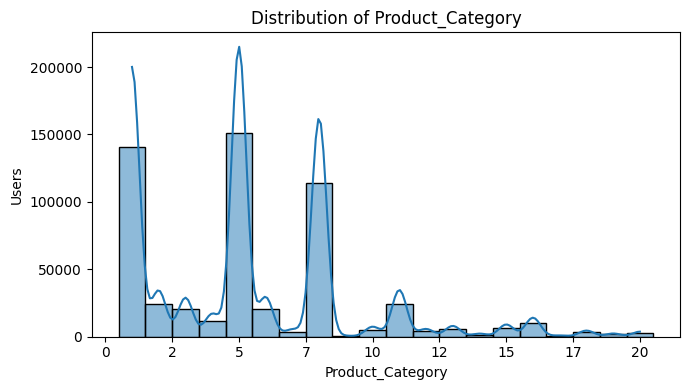

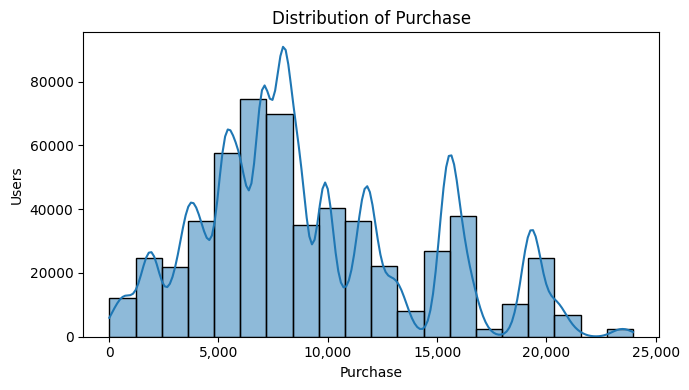

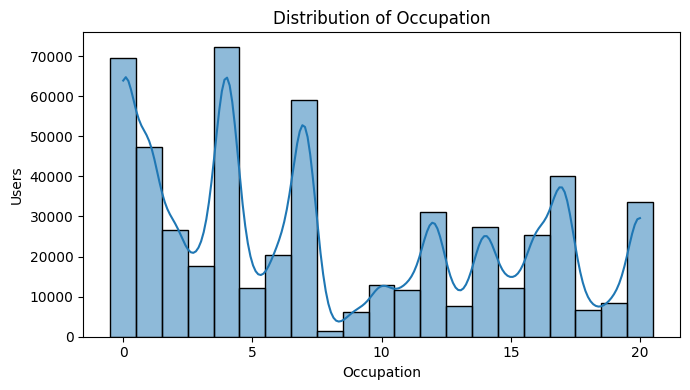

In [ ]:
#Distribution of Numeric Variables

numeric_col = ['Product_Category', 'Purchase', 'Occupation']

for col in numeric_col:
    plt.figure(figsize=(7, 4))
    sns.histplot(data=df, x=col, bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Users')
    plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    plt.tight_layout()
    plt.show()


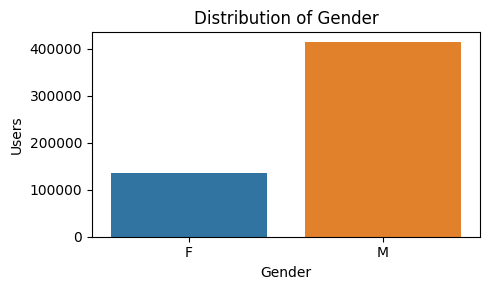

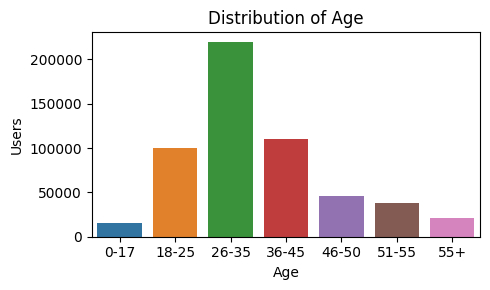

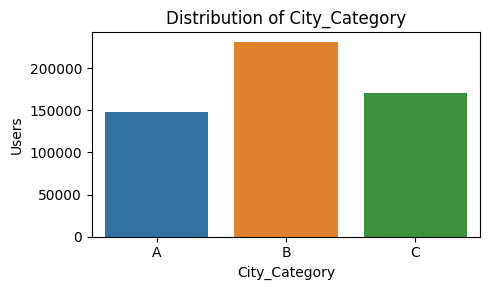

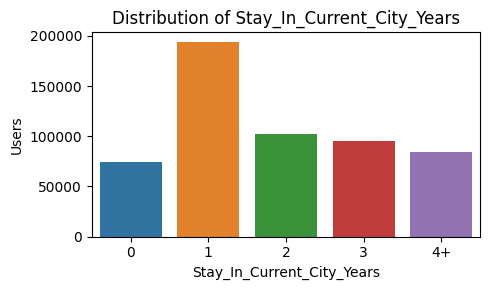

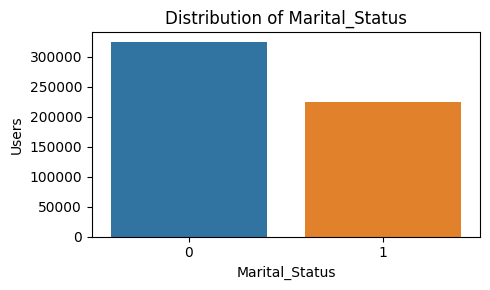

In [ ]:
#Distribution of Categorical Variables

categorical_col = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']

for col in categorical_col:
    plt.figure(figsize=(5, 3))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Users')
    plt.tight_layout()
    plt.show()


In [ ]:
product_gender = pd.crosstab(df['Gender'], df['Purchase'])
product_gender

Purchase,12,13,14,24,25,26,36,37,38,48,...,23951,23952,23953,23954,23955,23956,23958,23959,23960,23961
Gender,,,,,,,,,,,,,,,,,,,,,
F,27,25,30,28,30,27,36,31,34,33,...,1,0,0,0,1,0,0,1,0,0
M,74,81,65,90,83,85,71,79,80,75,...,0,1,2,2,2,1,4,1,4,3


**INSIGHTS**

* The histogram shows that Product Categories 1, 5, and 8 have significantly
higher user counts, indicating that these categories are the most popular
among customers. On the other hand, categories 20, 19, 14, 17, and 9 have
lower representation, suggesting potential areas for marketing focus or
improvement.
* The Purchase histogram reveals that the majority of transactions involve
lower purchase amounts, with a peak in the range of $5,000 to $10,000. The
distribution suggests a concentration of purchases at moderate values. While
there are fewer high-value transactions, the majority falls within the midrange. This could guide pricing strategies and promotions.
* The Occupation histogram illustrates that Occupation 4 is the most prevalent,
followed by Occupations 0, 7, and 1. Occupations 19, 13, 18, 9, and 8 have
lower representation, indicating a concentration of customers in specific
occupations.
* The count plot for Gender indicates a significant imbalance, with a much
higher count of male users compared to female users. This imbalance may
influence gender-specific marketing strategies.
* The Age distribution plot reveals that customers in the age group 26-35 have
the highest representation, followed by 36-45 and 18-25. The least
represented groups are 55+ and 0-17, suggesting a focus on the middle-aged
customer base.
* The count plot for City_Category shows that category B has the highest
number of users, followed by C and A.
* The plot indicates that customers who have stayed for 1 year in the current
city make the most purchases, followed by those who have stayed for 2 and 3
years.
* The Marital_Status count plot illustrates that there are more married users
(Marital Status 0) than unmarried users (Marital Status 1).
* Based on the analysis of the dataset, male customers at Walmart tend to
exhibit greater variability in purchase amounts, with a slightly higher median
compared to female customers. While the median purchase amounts are
similar, the distribution for male customers shows more outliers, indicating a
propensity for higher-value transactions.

**4. Answering the questions**

Are women spending more money per transaction than men? Why or Why not?

In [ ]:
#The average purchase amount for each gender

df = df[['Gender','Purchase']]
grouped = df.groupby('Gender').mean()
print(grouped)

           Purchase
Gender             
F       8734.565765
M       9437.526040


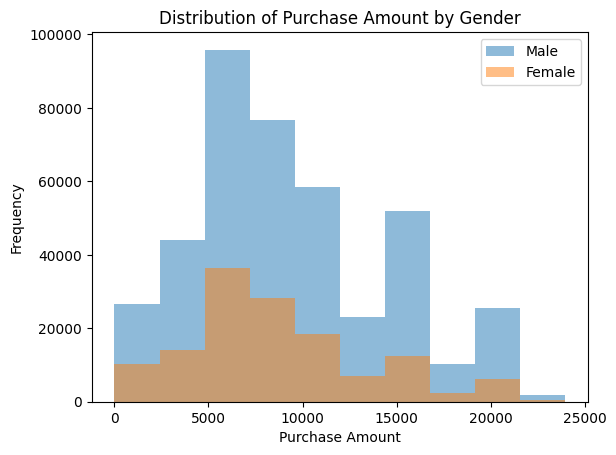

In [ ]:
#Histogram for Purchase Amount for each genders

df = df[['Gender', 'Purchase']]
male = df[df['Gender'] == 'M']['Purchase']
female = df[df['Gender'] == 'F']['Purchase']
plt.hist(male, alpha=0.5, label='Male')
plt.hist(female, alpha=0.5, label='Female')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Purchase Amount by Gender')
plt.legend()
plt.show()

The mean purchase amount for women is slightly lower than that for men,
indicating that, on average, men tend to spend slightly more per transaction.
This observation aligns with the boxplot analysis, where the distribution of
purchase amounts for men exhibits a wider spread and higher median
compared to women. Although there is overlap in the interquartile ranges,
the presence of more outliers for men suggests that some male customers
make notably high-value transactions, contributing to the higher mean.
Overall, while men have a slightly higher average spending per transaction,
both genders exhibit varied spending patterns.


**Confidence intervals and distribution of the mean of the expenses by female and male customers**

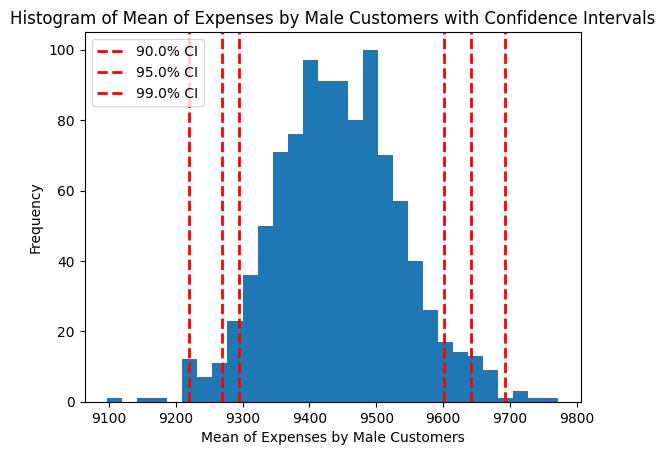

The 90.0% confidence interval of the mean of expenses by male customers is (9294.020849999999, 9601.837566666667)
The 95.0% confidence interval of the mean of expenses by male customers is (9269.29075, 9641.203899999999)
The 99.0% confidence interval of the mean of expenses by male customers is (9219.167433333334, 9692.527203333333)


In [ ]:

male_df = df[df['Gender'] == 'M']

# Parameters
sample_size = 3000
confidence_intervals = [0.90, 0.95, 0.99]
num_samples = 1000
sample_means = []

# Bootstrapping
for i in range(num_samples):
    samples = np.random.choice(male_df['Purchase'], size=sample_size, replace=True)
    sample_mean = samples.mean()
    sample_means.append(sample_mean)

# Calculate confidence intervals
confidence_interval_results = {}
for confidence_interval in confidence_intervals:
    lower_bound = np.percentile(sample_means, (1 - confidence_interval) / 2 * 100)
    upper_bound = np.percentile(sample_means, (1 + confidence_interval) / 2 * 100)
    confidence_interval_results[confidence_interval] = (lower_bound, upper_bound)

# Plotting
plt.hist(sample_means, bins=30)
for confidence_interval in confidence_interval_results:
    lower_bound, upper_bound = confidence_interval_results[confidence_interval]
    plt.axvline(lower_bound, color='red', linestyle='dashed', linewidth=2, label=f'{confidence_interval*100}% CI')
    plt.axvline(upper_bound, color='red', linestyle='dashed', linewidth=2)

plt.title("Histogram of Mean of Expenses by Male Customers with Confidence Intervals")
plt.xlabel('Mean of Expenses by Male Customers')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Display confidence intervals
for confidence_interval in confidence_intervals:
    lower_bound, upper_bound = confidence_interval_results[confidence_interval]
    print(f'The {confidence_interval * 100}% confidence interval of the mean of expenses by male customers is ({lower_bound}, {upper_bound})')


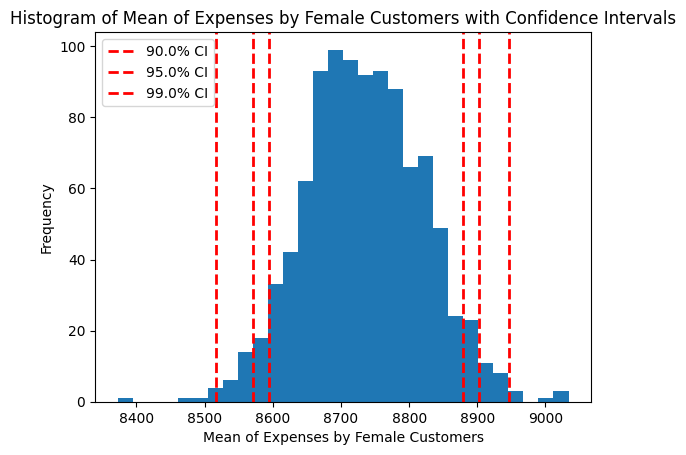

The 90.0% confidence interval of the mean of expenses by female customers is (8593.991766666668, 8878.344000000001)
The 95.0% confidence interval of the mean of expenses by female customers is (8570.216183333332, 8902.810108333333)
The 99.0% confidence interval of the mean of expenses by female customers is (8516.176335, 8946.38966)


In [ ]:
female_df = df[df['Gender'] == 'F']

# Parameters
sample_size = 3000
confidence_intervals = [0.90, 0.95, 0.99]
num_samples = 1000
sample_means = []

# Bootstrapping
for i in range(num_samples):
    samples = np.random.choice(female_df['Purchase'], size=sample_size, replace=True)
    sample_mean = samples.mean()
    sample_means.append(sample_mean)

# Calculate confidence intervals
confidence_interval_results = {}
for confidence_interval in confidence_intervals:
    lower_bound = np.percentile(sample_means, (1 - confidence_interval) / 2 * 100)
    upper_bound = np.percentile(sample_means, (1 + confidence_interval) / 2 * 100)
    confidence_interval_results[confidence_interval] = (lower_bound, upper_bound)

# Plotting
plt.hist(sample_means, bins=30)
for confidence_interval in confidence_interval_results:
    lower_bound, upper_bound = confidence_interval_results[confidence_interval]
    plt.axvline(lower_bound, color='red', linestyle='dashed', linewidth=2, label=f'{confidence_interval*100}% CI')
    plt.axvline(upper_bound, color='red', linestyle='dashed', linewidth=2)

plt.title("Histogram of Mean of Expenses by Female Customers with Confidence Intervals")
plt.xlabel('Mean of Expenses by Female Customers')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Display confidence intervals
for confidence_interval in confidence_intervals:
    lower_bound, upper_bound = confidence_interval_results[confidence_interval]
    print(f'The {confidence_interval * 100}% confidence interval of the mean of expenses by female customers is ({lower_bound}, {upper_bound})')



* The 90.0% confidence interval of the mean of expenses by male customers is
(9286.600316666667, 9590.980533333333).
* The 95.0% confidence interval of the mean of expenses by male customers is
(9259.563441666667, 9634.646275000001).
* The 99.0% confidence interval of the mean of expenses by male customers is
(9197.83718, 9703.545083333334) .
* 90.0% confidence interval suggests that we can be 90% confident that the true
mean of expenses by male customers falls between approximately USD 9286.60
and USD 9590.98. As we increase the confidence level to 95.0%, the interval
widens, indicating a greater level of certainty, with the range between
approximately USD 9259.56 and USD 9634.65. The 99.0% confidence interval is even
wider, spanning from around USD 9197.84 to USD 9703.55. This reflects a higher level of confidence but comes at the cost of a broader interval.

* The 90.0% confidence interval of the mean of expenses by female customers
is (8589.5447, 8874.89995)
* The 95.0% confidence interval of the mean of expenses by female customers
is (8569.057941666666, 8893.352191666667)
* The 99.0% confidence interval of the mean of expenses by female customers
is (8523.993261666668, 8962.426601666668).
* For female customers, the 90.0% confidence interval suggests that the true
mean of expenses is likely between approximately USD 8589.54 and USD 8874.90. The 95.0% confidence interval widens the range to approximately USD 8569.06 to
USD 8893.35, providing a higher level of certainty. The 99.0% confidence interval further expands from around USD 8523.99 to USD 8962.43, indicating the most conservative estimate with the highest level of certainty.


**Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?**

In [ ]:

# Assuming 'df' is your original DataFrame
male_df = df[df['Gender'] == 'M']['Purchase']
female_df = df[df['Gender'] == 'F']['Purchase']

# Bootstrap resampling
num_samples = 1000
male_sample_means = np.random.choice(male_df, size=(num_samples, len(male_df)), replace=True).mean(axis=1)
female_sample_means = np.random.choice(female_df, size=(num_samples, len(female_df)), replace=True).mean(axis=1)

# Confidence intervals
confidence_intervals = {
    90: [5, 95],
    95: [2.5, 97.5],
    99: [0.5, 99.5]
}

male_cis = {level: np.percentile(male_sample_means, interval) for level, interval in confidence_intervals.items()}
female_cis = {level: np.percentile(female_sample_means, interval) for level, interval in confidence_intervals.items()}

# Check if confidence intervals overlap for each level
overlaps = {level: (male_cis[level][1] >= female_cis[level][0]) and (female_cis[level][1] >= male_cis[level][0]) for level in confidence_intervals}

# Plotting for visualization
plt.figure(figsize=(12, 8))
plt.hist(male_sample_means, bins=30, alpha=0.5, label='Male', color='orange')
plt.hist(female_sample_means, bins=30, alpha=0.5, label='Female', color='purple')

# Plot confidence intervals with different colors
colors = {'90': 'green', '95': 'blue', '99': 'red'}
for level, interval in confidence_intervals.items():
    plt.axvline(male_cis[level][0], color=colors[str(level)], linestyle='dashed', linewidth=2, label=f'Male {level}% CI')  # Label only for the first CI
    plt.axvline(male_cis[level][1], color=colors[str(level)], linestyle='dashed', linewidth=2)
    plt.axvline(female_cis[level][0], color=colors[str(level)], linestyle='dashed', linewidth=2, label=f'Female {level}% CI')  # Label only for the first CI
    plt.axvline(female_cis[level][1], color=colors[str(level)], linestyle='dashed', linewidth=2)

plt.title("Distribution of Mean Spending by Gender with Confidence Intervals")
plt.xlabel('Mean Spending')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Print results
for level, overlap in overlaps.items():
    print(f"The {level}% confidence interval for male spending is {male_cis[level]}")
    print(f"The {level}% confidence interval for female spending is {female_cis[level]}")
    print(f"Do the confidence intervals overlap at {level}% confidence level? {overlap}")
    print()


* The confidence intervals of average male and female spending do not overlap
at different confidence levels (90%, 95%, and 99%).
* This suggests statistically significant differences in spending behavior between
genders.
* To leverage this conclusion, Walmart can tailor its marketing strategies,
promotions, and product assortments to better cater to the distinct
preferences and purchasing patterns of male and female customers. By
implementing gender-specific initiatives, Walmart can enhance customer
satisfaction, improve targeted marketing efforts, and optimize inventory
management to align with the unique characteristics of each customer
segment.

**Does Confidence Interval for Married vs Unmarried overlap?**

In [ ]:
marital_df = df[['Marital_Status', 'Purchase']]

# Separate data for married and unmarried customers
married_df = marital_df[marital_df['Marital_Status'] == 1]['Purchase']
unmarried_df = marital_df[marital_df['Marital_Status'] == 0]['Purchase']


# Bootstrap resampling
num_samples = 1000
married_sample_means = np.random.choice(married_df, size=(num_samples, len(married_df)), replace=True).mean(axis=1)
unmarried_sample_means = np.random.choice(unmarried_df, size=(num_samples, len(unmarried_df)), replace=True).mean(axis=1)

# Confidence intervals
confidence_intervals = {
    90: [5, 95],
    95: [2.5, 97.5],
    99: [0.5, 99.5]
}

married_cis = {level: np.percentile(married_sample_means, interval) for level, interval in confidence_intervals.items()}
unmarried_cis = {level: np.percentile(unmarried_sample_means, interval) for level, interval in confidence_intervals.items()}

# Check if confidence intervals overlap for each level
overlaps = {level: (married_cis[level][1] >= unmarried_cis[level][0]) and (unmarried_cis[level][1] >= married_cis[level][0]) for level in confidence_intervals}

# Plotting for visualization
plt.figure(figsize=(12, 8))
plt.hist(married_sample_means, bins=30, alpha=0.5, label='Married', color='green')
plt.hist(unmarried_sample_means, bins=30, alpha=0.5, label='Unmarried', color='blue')

# Plot confidence intervals with different colors
colors = {'90': 'orange', '95': 'purple', '99': 'red'}
for level, interval in confidence_intervals.items():
    plt.axvline(married_cis[level][0], color=colors[str(level)], linestyle='dashed', linewidth=2, label=f'Married {level}% CI')  # Label only for the first CI
    plt.axvline(married_cis[level][1], color=colors[str(level)], linestyle='dashed', linewidth=2)
    plt.axvline(unmarried_cis[level][0], color=colors[str(level)], linestyle='dashed', linewidth=2, label=f'Unmarried {level}% CI')  # Label only for the first CI
    plt.axvline(unmarried_cis[level][1], color=colors[str(level)], linestyle='dashed', linewidth=2)

plt.title("Distribution of Mean Spending by Marital Status with Confidence Intervals")
plt.xlabel('Mean Spending')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Print results
for level, overlap in overlaps.items():
    print(f"The {level}% confidence interval for married spending is {married_cis[level]}")
    print(f"The {level}% confidence interval for unmarried spending is {unmarried_cis[level]}")
    print(f"Do the confidence intervals overlap at {level}% confidence level? {overlap}")
    print()


The confidence intervals for married and unmarried spending do overlap at
90%, 95%, and 99% confidence levels. This indicates that there is no statistically
significant difference in spending between married and unmarried customers
within the observed confidence intervals.


### **Final Insights**
* **Gender and Purchase Distribution**: The univariate analysis of gender
distribution shows a fairly balanced representation in the dataset. The
bivariate analysis, particularly the boxplot and mean comparison, indicates
that, on average, there is no substantial difference in purchase amounts
between genders. However, exploring further with confidence intervals
reveals nuanced insights.

* **Age and Purchase Distribution**: The age distribution skews towards the 26-35
age group, and the purchase distribution is relatively uniform across age
groups. The bivariate analysis, such as count plots and boxplots, reveals that
the 0-17 and 51-55 age groups tend to have slightly different purchasing
patterns. Confidence intervals suggest significant variations in spending
among different age groups.

* **City Category and Purchase Distribution**: The city category distribution is
imbalanced, with more data from City B. Bivariate analysis using boxplots
indicates that City B tends to have higher spending, but the 90%, 95%, and
99% confidence intervals reveal the magnitude and significance of these
differences.

* **Marital Status and Purchase Distribution**: The marital status distribution
shows a fairly balanced representation of married and unmarried individuals.
Boxplots and confidence intervals illustrate that there is some difference in
spending between married and unmarried individuals, with confidence
intervals helping quantify the significance.

* **Stay in Current City Years and Purchase Distribution**: The distribution of
'Stay_In_Current_City_Years' suggests a higher concentration of individuals
who have stayed for 1 year in the current city. The bivariate analysis reveals
subtle differences in spending patterns for different stay durations.
Confidence intervals help assess the statistical significance.

* **Gender and Purchase Amounts0**: The histogram and boxplot comparisons for
purchase amounts between genders show some overlap but also subtle
differences. Confidence intervals help quantify and clarify that, statistically,
there is no significant difference in average spending between men and
women.

* **Age and Purchase Amounts:** The boxplots and histograms for different age
groups illustrate variations in purchase amounts. Confidence intervals show
that these variations are statistically significant, providing insights into the
diverse spending behaviors across age categories.

* **Marital Status and Purchase Amounts:** The boxplots and histograms for
married and unmarried individuals highlight differences in purchase amounts.
Confidence intervals demonstrate the statistical significance of these
differences, offering insights into the spending variations based on marital
status.

* **City Category and Purchase Amounts:** Boxplots and histograms for different
city categories illustrate variations in spending patterns. Confidence intervals
help quantify these variations, allowing for a more accurate assessment of
the significance of differences in purchase amounts between city categories.

* **Implications for the Population:** Insights derived from the dataset,
particularly those supported by confidence intervals, provide a basis for
generalization to the broader population. While the dataset may not perfectly
represent the entire population, the statistical analyses allow for reasonable
inferences about potential trends in customer behavior.

* In summary, the exploration and application of the Central Limit Theorem
(CLT) techniques provide valuable insights into the relationships between
variables and the distribution of purchase amounts. These insights can guide
strategic decisions for marketing, promotions, and customer engagement at
Walmart.

# **Recommendations**

1. **Targeted Marketing Campaigns**:
Use insights from customer demographics (age, gender, marital status) to
tailor marketing campaigns. For example, create promotions that resonate
with specific age groups or marital statuses.

2. **City-Specific Promotions:**
Implement city-specific promotions based on spending patterns. Focus on
promoting products or discounts that align with the preferences of
customers in each city category.

3. **Customer Loyalty Programs:**
Introduce or enhance loyalty programs to incentivize repeat purchases.
Provide exclusive offers or discounts to customers who consistently make
purchases, fostering loyalty.

4. **Seasonal and Holiday Promotions:**
Plan promotions around key seasons and
holidays. Offer special deals or discounts during festive periods to capitalize on
increased consumer spending.

5. **Online Shopping Experience:**
 Enhance the online shopping experience by simplifying the interface and
improving website navigation. Ensure a user-friendly platform to attract
and retain customers.

6. **Customer Feedback Mechanism:**
 Establish a straightforward feedback mechanism to understand customer
preferences and concerns. Actively seek customer opinions to make datadriven improvements to products and services.

7. **Marital Status-Specific Offers:**
 Design promotions that cater to both married and unmarried individuals.
Tailor offers to align with the preferences and needs of each segment.

8. **Promote Localized Products:**
 Highlight and promote products that are popular or unique to specific
regions. This approach can boost sales by aligning with local tastes and
preferences.

9. **Flexible Return Policies:**
Implement customer-friendly return policies to build trust and
confidence. A hassle-free return process can positively impact customer
satisfaction and encourage repeat business.

10. **Community Engagement Events:**
 Organize community engagement events to foster a sense of belonging.
Sponsor local events, participate in community initiatives, and showcase
Walmart's commitment to the well-being of the communities it serves.
